# Ley de Moore

##### Código para graficar la relación entre el número de transistores por procesador con respecto al tiempo (conteo de años desde el año 1970 hasta el 2021). Se resaltan algunos procesadores llamativos, de empresas como Intel, Apple, Xbox y AMD.

In [1]:
import matplotlib.pyplot as mpl
import pandas as pd
import numpy as np

In [2]:
url='https://en.wikipedia.org/wiki/Transistor_count'

In [16]:
mdw=pd.read_csv('transistors-per-microprocessor-wp.csv', thousands=',') #Importar el archivo con los datos guardado desde wikipedia.
#Visualizar los nombres de las columnas en la tabla de datos
for col in mdw.columns: 
    print(col) 

Processor
MOS transistor count
Date ofintroduction
Designer
MOS process(nm)
Area (mm2)


In [12]:
coluw=mdw.columns.values.tolist() #Guardar en una lista los nombres de las columnas.
minyear=mdw['Date ofintroduction'].min() #Guardar en una variable numérica el valor del año más pequeño.

In [9]:
mdw2=pd.read_csv('transistors_some.csv', thousands=',') #Segundo archivo el cual contiene sólo los datos de unos cuantos procesadores que se van a resaltar.
count_row=mdw2.shape[0] #Number of rows 

In [10]:
#Esta sección se hizo para organizar la posición de los marcadores de los datos que se van a resaltar.
yincexp=[4.8,6.6,8.5,10,10.7] #Exponente del incremento-> Dado que y es logarítmico
yinc0=np.array(yincexp) #Se guardaron los exponentes del incremento en variable numérica.
yinc=np.power(10,yinc0) #Este es el incremento real de la posición de los marcadores en el eje y.
ys=np.array([1,1,-1,+1,1]) #Signo + o -, que significa incremento o disminución.
yinc=np.multiply(yinc,ys) #Multiplicación por el signo.
xinc=np.array([0,0,+5,-3,0]) #Incremento de la posición de los marcadores en el eje x. Esto se hizo para que tuviera una mejor visualización y los marcadores no se sobrepusieran entre ellos.  
print(yinc)

[ 6.30957344e+04  3.98107171e+06 -3.16227766e+08  1.00000000e+10
  5.01187234e+10]


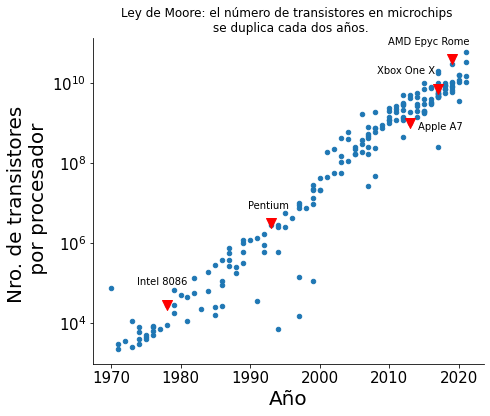

In [13]:
mplotw=mdw.plot.scatter(x=coluw[2],y=coluw[1],logy=True,title='Ley de Moore: el número de transistores en microchips \n se duplica cada dos años.',figsize=(7,7),fontsize=15)
mplotw2=mdw2.plot.scatter(x=coluw[2],y=coluw[1],logy=True,figsize=(7,6),marker='v',color = 'red',ax=mplotw, s=100)
#mdw2[[coluw[2],coluw[1],coluw[0]]].apply(lambda x: mplotw2.text(*x),axis=1)
mplotw.set_xlabel('Año',fontsize=20)
mplotw.set_ylabel('Nro. de transistores \n por procesador',fontsize=20)
mplotw.spines['top'].set_visible(False)
mplotw.spines['right'].set_visible(False)
#fig = mplotw.get_figure()
#fig.savefig("ley_de_moore.png")
for i in range (0,count_row):
  mpl.annotate(mdw2[coluw[0]][i],xy=(mdw2[coluw[2]][i],mdw2[coluw[1]][i]),ha='right',xytext=(mdw2[coluw[2]][i]+3+xinc[i],mdw2[coluw[1]][i]+yinc[i]))
mplotw.figure.savefig('ley_de_moore.png',bbox_inches='tight')
mpl.show(block=True)